In [2]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

- analyze only the users and not the admins
- create two lists of values (for working days and for weekends) for the histogram
input
- the figsize is still the same, you can choose the fontsize as well as the color palette
- use a level of transparency for the histogram in front equal to 0.7
- at the end of your Jupyter Notebook, create a markdown cell and insert the question:
    - “Are there hours when the total number of commits was higher on weekends than
    on working days?” In your answer, put the top-4 examples.

In [44]:
conn = sqlite3.connect('../data/checking-logs.sqlite')

In [46]:
df = pd.io.sql.read_sql(
    """
    SELECT
        CAST(strftime('%H', timestamp) AS INTEGER) AS hour,
        CASE
            WHEN strftime('%w', timestamp) IN('0', '6') THEN 'weekend'
            ELSE 'workday'
        END AS day_type
    FROM checker 
    WHERE uid LIKE 'user_%'
    """, 
    conn,
    dtype={'hour': 'int'})

In [48]:
df_weekend = df[df.day_type == 'weekend']
df_workday = df[df.day_type == 'workday']

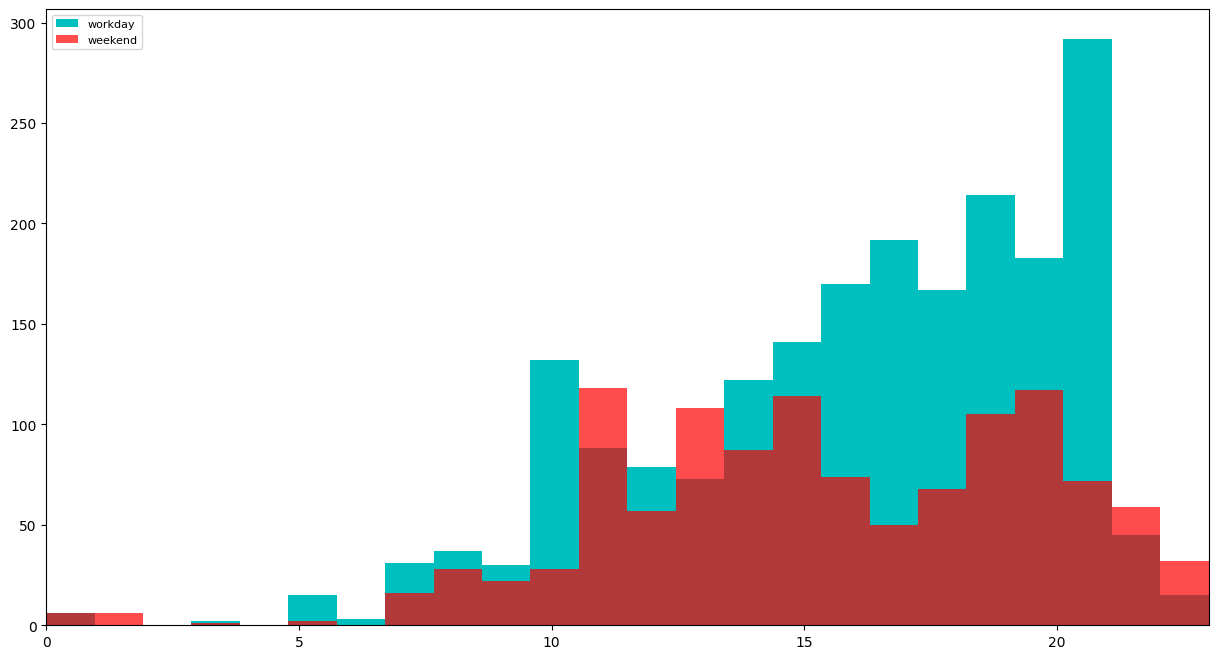

In [50]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.hist(df_workday['hour'],
        bins=24,
        label='workday',
        color='c')
ax.hist(df_weekend['hour'],
        bins=24,
        label='weekend',
        color='r',
        alpha=0.7)
ax.set_xlim(0, 23)
ax.legend(loc='upper left', fontsize='8')
plt.show()

“Are there hours when the total number of commits was higher on weekends than
    on working days?” In your answer, put the top-4 examples.  
ANSWER: YES-11,13,22,23

In [77]:
df_we = df_weekend.groupby('hour').count().reset_index()
df_wd = df_workday.groupby('hour').count().reset_index()

df_we[df_we['day_type'] > df_wd['day_type']] \
    .sort_values(by='day_type', ascending=False) \
        .rename(columns={'day_type': 'comm_count'})

,hour,comm_count
8,11,118
10,13,108
19,22,59
20,23,32
1,1,6


In [79]:
conn.close()